In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

from sklearn.cluster import KMeans, HDBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3D plots

#  1. Entendimiento de datos 


In [2]:
import pandas as pd 
pd.set_option('display.max_columns', 25)
pd.set_option('display.max_row', 50)

np.random.seed(3301)

%matplotlib inline
import matplotlib.pyplot as plt


In [3]:
#Ubicación de los datos 
db_location = './Data/OutputDatos2.csv'

In [4]:
#Cargar datos
df_movil= pd.read_csv(db_location)

In [5]:
#Dimension de los datos
df_movil.shape

(7457, 8)

In [6]:
#Ver los datos 
display(df_movil.sample(5))
display(df_movil.head(5))
#display(df_movil.tail(5))

,titleType,startYear,runtimeMinutes,averageRating,numVotes,region,main_genre,secondary_genre
4811,movie,2020,150,"7,3",534818,IN,Action,Sci-Fi
3009,movie,2012,174,"6,9",25606,IN,Action,Crime
1578,movie,2011,104,"6,9",259909,IN,Adventure,Comedy
175,tvSeries,1997,55,"8,7",102778,IN,Crime,Drama
4052,tvSeries,2015,49,"8,5",400629,IN,Crime,Drama


,titleType,startYear,runtimeMinutes,averageRating,numVotes,region,main_genre,secondary_genre
0,movie,1991,137,"8,6",1128166,US,Action,Sci-Fi
1,tvSeries,2000,22,"6,6",577,US,Action,Adventure
2,movie,2002,150,"8,5",860569,US,Biography,Drama
3,movie,2004,120,"7,5",417391,US,Action,Crime
4,movie,2005,132,"6,9",5946,US,Biography,Drama


# Manipulación de los datos 

In [7]:
df_movil.dtypes

titleType          object
startYear           int64
runtimeMinutes      int64
averageRating      object
numVotes            int64
region             object
main_genre         object
secondary_genre    object
dtype: object

In [8]:
df_movil.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7457 entries, 0 to 7456
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   titleType        7457 non-null   object
 1   startYear        7457 non-null   int64 
 2   runtimeMinutes   7457 non-null   int64 
 3   averageRating    7457 non-null   object
 4   numVotes         7457 non-null   int64 
 5   region           7457 non-null   object
 6   main_genre       7457 non-null   object
 7   secondary_genre  7457 non-null   object
dtypes: int64(3), object(5)
memory usage: 466.2+ KB


In [9]:
df_movil.describe()

,startYear,runtimeMinutes,numVotes
count,7457.000000,7457.000000,7.457000e+03
mean,2013.157570,100.780072,7.261476e+04
std,6.976007,64.623465,1.623115e+05
min,1990.000000,3.000000,1.000000e+01
25%,2008.000000,60.000000,6.290000e+03
50%,2015.000000,101.000000,1.529200e+04
75%,2019.000000,122.000000,5.646600e+04
max,2023.000000,990.000000,2.197234e+06


In [10]:
data_objects = df_movil.select_dtypes(include = ['object']).columns
df_movil[data_objects].describe()

,titleType,averageRating,region,main_genre,secondary_genre
count,7457,7457,7457,7457,7457
unique,4,31,4,22,26
top,movie,"6,7",IN,Drama,Drama
freq,4672,475,5580,1766,2422


In [11]:
for o  in data_objects:
    le = LabelEncoder()
    le.fit(df_movil[o])
    df_movil[o] = le.transform(df_movil[o])

In [12]:
df_movil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7457 entries, 0 to 7456
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   titleType        7457 non-null   int32
 1   startYear        7457 non-null   int64
 2   runtimeMinutes   7457 non-null   int64
 3   averageRating    7457 non-null   int32
 4   numVotes         7457 non-null   int64
 5   region           7457 non-null   int32
 6   main_genre       7457 non-null   int32
 7   secondary_genre  7457 non-null   int32
dtypes: int32(5), int64(3)
memory usage: 320.5 KB


In [13]:
df_movil.describe()

,titleType,startYear,runtimeMinutes,averageRating,numVotes,region,main_genre,secondary_genre
count,7457.000000,7457.000000,7457.000000,7457.000000,7.457000e+03,7457.000000,7457.000000,7457.000000
mean,1.009387,2013.157570,100.780072,8.637254,7.261476e+04,1.533727,3.989004,8.754459
std,1.374456,6.976007,64.623465,6.008017,1.623115e+05,0.866781,2.960648,6.268785
min,0.000000,1990.000000,3.000000,0.000000,1.000000e+01,0.000000,0.000000,0.000000
25%,0.000000,2008.000000,60.000000,4.000000,6.290000e+03,2.000000,1.000000,4.000000
50%,0.000000,2015.000000,101.000000,8.000000,1.529200e+04,2.000000,4.000000,6.000000
75%,3.000000,2019.000000,122.000000,13.000000,5.646600e+04,2.000000,7.000000,16.000000
max,3.000000,2023.000000,990.000000,30.000000,2.197234e+06,3.000000,21.000000,25.000000


In [14]:
# copia para HDBScan
datacopiaB = df_movil.copy()

# Modelamiento clustering jerarquico 

In [14]:
# Importa las bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Columnas a utilizar para el clustering
features = ['startYear', 'runtimeMinutes', 'averageRating', 'numVotes', 'region','main_genre', 'secondary_genre']
X = df_movil[features]

In [15]:
# Normalizamos los datos para que todas las características tengan la misma escala
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

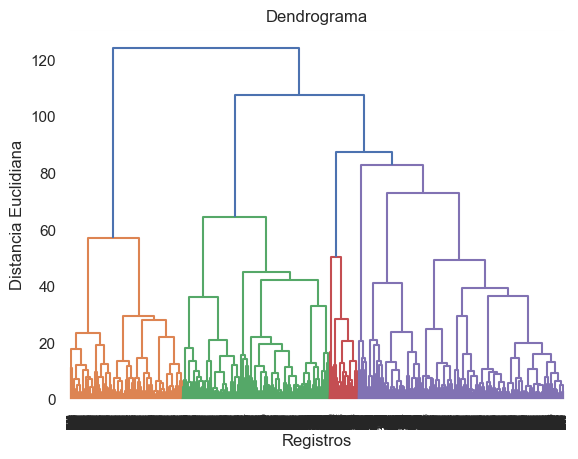

In [16]:

# Usar dendrograma para determinar el número óptimo de clústeres
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrograma')
plt.xlabel('Registros')
plt.ylabel('Distancia Euclidiana')
plt.show()


In [17]:
# Basado en el dendrograma, eligimo el número óptimo de clústeres pero no entiendo bien como analizamos el dendrograma
# Luego podemos ir ajustando el modelo de clustering
num_clusters = 3 # Cambia esto según como elegimos a partir del dendrograma

In [18]:
# Ajustamos el modelo de clustering jerárquico
model = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward', affinity='euclidean')
clusters = model.fit_predict(X_scaled)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [19]:
# Aniadimos o agregamos la columna de clústeres a los datos originales para que guarden los datos
df_movil['Cluster'] = clusters

In [20]:
# Visualiza los resultados 
for cluster_id in range(num_clusters):
    cluster_data = df_movil[df_movil['Cluster'] == cluster_id]
    print(f"Cluster {cluster_id + 1}: {len(cluster_data)} registros")


Cluster 1: 3543 registros
Cluster 2: 1707 registros
Cluster 3: 2207 registros


In [21]:

import pandas as pd

# Vamos a Filtrar los datos por cluster, vamos a ver los datos estadisticos por cada cluster
cluster_1_data = df_movil[df_movil['Cluster'] == 1]
cluster_2_data = df_movil[df_movil['Cluster'] == 2]
#cluster_3_data = df_movil[df_movil['Cluster'] == 3]
#cluster_4_data = df_movil[df_movil['Cluster'] == 4]


# Estadísticas descriptivas para el Cluster 1
stats_cluster_1 = cluster_1_data[['startYear', 'runtimeMinutes', 'averageRating', 'numVotes', 'region','main_genre', 'secondary_genre']].describe()

# Estadísticas descriptivas para el Cluster 2
stats_cluster_2 = cluster_2_data[['startYear', 'runtimeMinutes', 'averageRating', 'numVotes', 'region','main_genre', 'secondary_genre']].describe()

# Estadísticas descriptivas para el Cluster 3
#stats_cluster_3 = cluster_3_data[['startYear', 'runtimeMinutes','averageRating','numVotes']].describe()

#stats_cluster_4 = cluster_4_data[['startYear', 'runtimeMinutes','averageRating','numVotes']].describe()

# Imprimimos las estadísticas descriptivas para cada cluster
print("Estadísticas descriptivas para el Cluster 1:")
print(stats_cluster_1)
print("\nEstadísticas descriptivas para el Cluster 2:")
print(stats_cluster_2)
#print("\nEstadísticas descriptivas para el Cluster 3:")
#print(stats_cluster_3)
#print("\nEstadísticas descriptivas para el Cluster 4:")
#print(stats_cluster_4)



Estadísticas descriptivas para el Cluster 1:
         startYear  runtimeMinutes  averageRating       numVotes       region  \
count  1707.000000     1707.000000    1707.000000    1707.000000  1707.000000   
mean   2010.713533       97.984769       6.729936   18216.861746     0.001757   
std       5.944394       37.834244       4.818177   27848.459705     0.041898   
min    1990.000000        4.000000       0.000000      12.000000     0.000000   
25%    2006.000000       86.000000       3.000000    4831.000000     0.000000   
50%    2011.000000      101.000000       6.000000    8221.000000     0.000000   
75%    2016.000000      114.000000      10.000000   18273.000000     0.000000   
max    2023.000000      430.000000      24.000000  475408.000000     1.000000   

        main_genre  secondary_genre  
count  1707.000000      1707.000000  
mean      4.368483         9.523726  
std       2.289845         6.065768  
min       0.000000         0.000000  
25%       3.000000         6.000000

In [22]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#### analizando como funciona para ver los clusters





# Reduce la dimensionalidad a 2 dimensiones utilizando PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Crea un DataFrame con las proyecciones PCA y la etiqueta de cluster
pca_df = pd.DataFrame(data={'PCA1': X_pca[:, 0], 'PCA2': X_pca[:, 1], 'Cluster': clusters})

# Visualiza los clusters en un gráfico de dispersión
plt.figure(figsize=(10, 6))
for cluster_id in range(num_clusters):
    cluster_data = pca_df[pca_df['Cluster'] == cluster_id]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster_id + 1}')

plt.title('Visualización de Clusters (PCA)')
plt.xlabel('Componente Principal 1 (PCA1)')
plt.ylabel('Componente Principal 2 (PCA2)')
plt.legend()
plt.show()


: 

: 

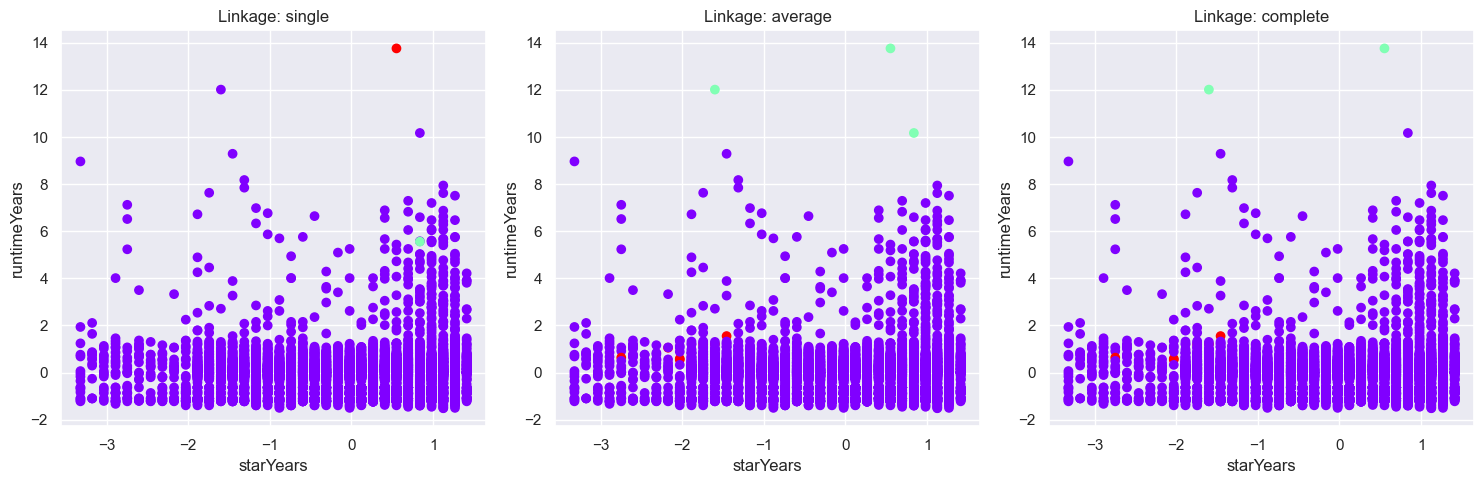

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import AgglomerativeClustering


connectivity_matrix = kneighbors_graph(X_scaled, n_neighbors=60, mode='distance')

linkage_methods = ['single', 'average', 'complete']

fig, axes = plt.subplots(1, len(linkage_methods), figsize=(15, 5))

for i, linkage_method in enumerate(linkage_methods):
    
    model = AgglomerativeClustering(n_clusters=num_clusters, linkage=linkage_method, connectivity=connectivity_matrix)
    clusters = model.fit_predict(X_scaled)
    
   
    axes[i].scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='rainbow')
    axes[i].set_title(f'Linkage: {linkage_method}')
    axes[i].set_xlabel('starYears')
    axes[i].set_ylabel('runtimeYears')

plt.tight_layout()
plt.show()


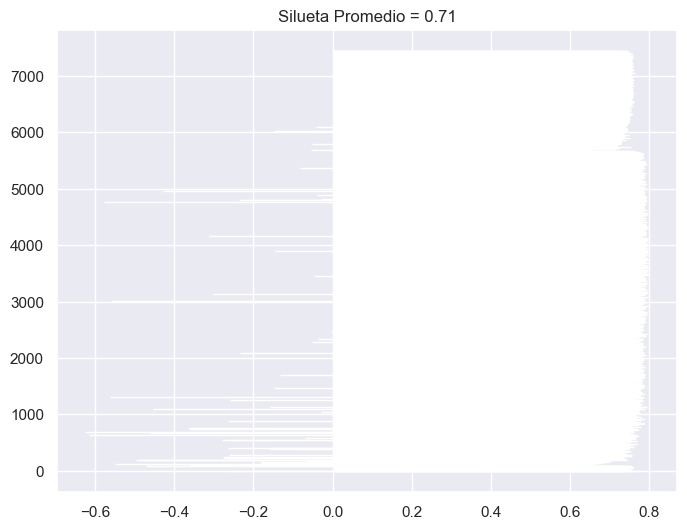

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt

# Calcula la silueta para cada punto
silhouette_values = silhouette_samples(X_scaled, clusters)

# Calcula la silueta promedio para cada cluster
cluster_silhouette_avg = silhouette_score(X_scaled, clusters)

# Crea un gráfico de barras de la silueta promedio para cada cluster
plt.figure(figsize=(8, 6))
for cluster_id in range(num_clusters):
    cluster_silhouette_values = silhouette_values[clusters == cluster_id]
    plt.barh(range(len(cluster_silhouette_values)), cluster_silhouette_values, height=1)
    plt.title(f'Silueta Promedio = {cluster_silhouette_avg:.2f}')
plt.show()

# Modelamiento HDBScan

Esta seccion esta realizada por Juan Camilo Gonzalez 20191130

In [15]:
# Normalizamos los datos
data_normalizada = (datacopiaB - datacopiaB.min()) / (datacopiaB.max() - datacopiaB.min())
data_normalizada

,titleType,startYear,runtimeMinutes,averageRating,numVotes,region,main_genre,secondary_genre
0,0.0,0.030303,0.135765,0.700000,0.513446,1.0,0.000000,0.76
1,1.0,0.303030,0.019250,0.033333,0.000258,1.0,0.000000,0.00
2,0.0,0.363636,0.148936,0.666667,0.391657,1.0,0.142857,0.24
3,0.0,0.424242,0.118541,0.333333,0.189958,1.0,0.000000,0.16
4,0.0,0.454545,0.130699,0.133333,0.002702,1.0,0.142857,0.24
...,...,...,...,...,...,...,...,...
7452,0.0,0.878788,0.106383,0.266667,0.001715,0.0,0.333333,0.72
7453,1.0,0.878788,0.022290,0.333333,0.001506,0.0,0.095238,0.12
7454,0.0,0.878788,0.097264,0.233333,0.001518,0.0,0.333333,0.72
7455,0.0,0.878788,0.082067,0.133333,0.001655,0.0,0.333333,0.64


In [16]:
#Hacemos busqueda del hiperparametro min_cluster_size 
n_noise = []
n_cluster = []
n_silu = []
inf = 5
sup = 40
paso = 1
for i in np.arange(inf, sup, paso):
  hdbscan = HDBSCAN(min_cluster_size=i)
  labels = hdbscan.fit_predict(data_normalizada)
  n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
  n_noises = list(labels).count(-1)
  n_noise.append(n_noises)
  n_cluster.append(n_clusters)
  # Poner # en la siguiente linea si  mata el kernel
  n_silu.append(silhouette_score(data_normalizada, labels))

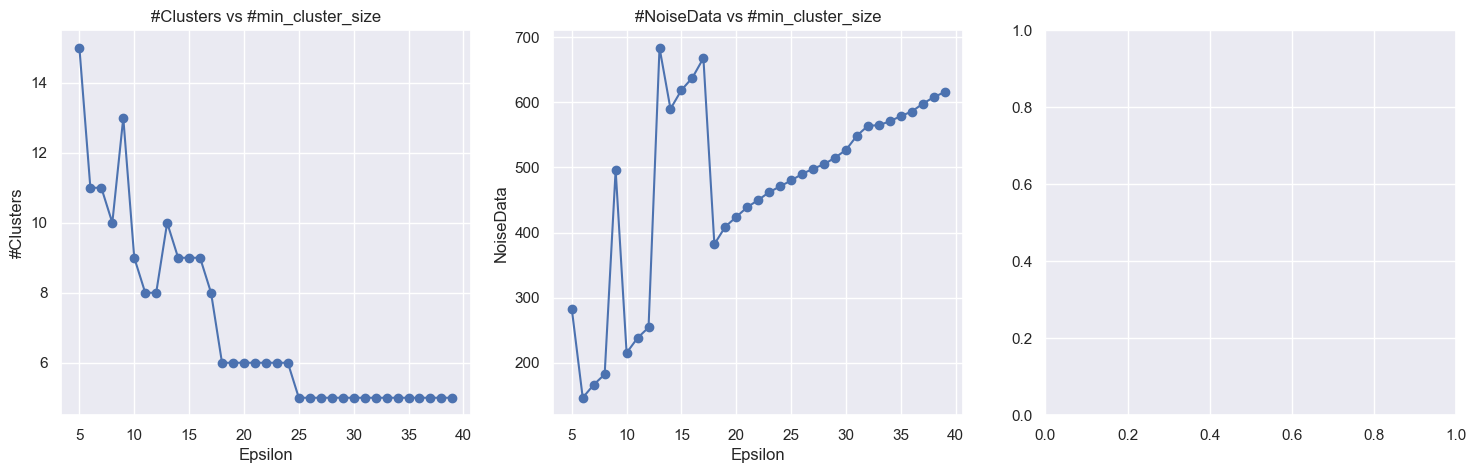

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].set_title('#Clusters vs #min_cluster_size')
axs[0].plot(np.arange(inf, sup, paso), n_cluster, marker='o')
axs[0].set_ylabel('#Clusters')

axs[1].set_title('#NoiseData vs #min_cluster_size')
axs[1].plot(np.arange(inf, sup, paso), n_noise, marker='o')
axs[1].set_ylabel('NoiseData')

# Poner # en las siguientes lineas si mata el kernel silhouette_score
axs[2].set_title('Silhouette vs epsilon')
axs[2].plot(np.arange(inf, sup, paso), n_silu, marker='o')
axs[2].set_ylabel('Coeficiente Silueta')


axs[0].set_xlabel('Epsilon')
axs[1].set_xlabel('Epsilon')

# Poner # en las siguientes lineas si mata el kernel silhouette_score
axs[2].set_xlabel('Epsilon')
plt.show()

In [18]:
# Se escogio como hiper parametro min_cluster_size=25
hdb = HDBSCAN(min_cluster_size=25)
clustering = hdb.fit_predict(data_normalizada)
HDBSCAN_data = datacopiaB.copy()
HDBSCAN_data.loc[:,'Cluster'] = clustering
n_clusters = len(set(clustering)) - (1 if -1 in clustering else 0)

In [19]:
# Resultados # de filas por cluster (-1 outliners)
HDBSCAN_data.Cluster.value_counts().to_frame()

,Cluster
3,3196
0,1934
2,1316
-1,480
1,300
4,231


In [20]:
# Graficas de clusters
# Vamos a Filtrar los datos por cluster, vamos a ver los datos estadisticos por cada cluster
cdata0 = HDBSCAN_data[HDBSCAN_data['Cluster'] == 0]
cdata1 = HDBSCAN_data[HDBSCAN_data['Cluster'] == 1]
cdata2 = HDBSCAN_data[HDBSCAN_data['Cluster'] == 2]
cdata3 = HDBSCAN_data[HDBSCAN_data['Cluster'] == 3]
cdata4 = HDBSCAN_data[HDBSCAN_data['Cluster'] == 4]


cstats0 = cdata0.describe()

cstats1 = cdata1.describe()

cstats2 = cdata2.describe()

cstats3 = cdata3.describe()

cstats4 = cdata4.describe()

# Imprimimos las estadísticas descriptivas para cada cluster
print("Estadísticas descriptivas para el Cluster 0:")
print(cstats0)
print("\nEstadísticas descriptivas para el Cluster 1:")
print(cstats1)
print("\nEstadísticas descriptivas para el Cluster 2:")
print(cstats2)
print("\nEstadísticas descriptivas para el Cluster 3:")
print(cstats3)
print("\nEstadísticas descriptivas para el Cluster 4:")
print(cstats4)

Estadísticas descriptivas para el Cluster 0:
       titleType    startYear  runtimeMinutes  averageRating       numVotes  \
count     1934.0  1934.000000     1934.000000    1934.000000    1934.000000   
mean         3.0  2014.740434       49.244571      11.579628   42006.099793   
std          0.0     6.623560       35.499388       6.209701   79549.242278   
min          3.0  1990.000000        3.000000       0.000000    3003.000000   
25%          3.0  2011.000000       30.000000       7.000000    6492.500000   
50%          3.0  2017.000000       45.000000      12.000000   14631.000000   
75%          3.0  2020.000000       60.000000      16.000000   37739.500000   
max          3.0  2023.000000      409.000000      30.000000  741062.000000   

            region   main_genre  secondary_genre  Cluster  
count  1934.000000  1934.000000      1934.000000   1934.0  
mean      2.000517     3.710445         8.092037      0.0  
std       0.022739     2.577495         6.107742      0.0  
min

<Axes: title={'center': 'numVotes & Cluster'}, ylabel='Promedio'>

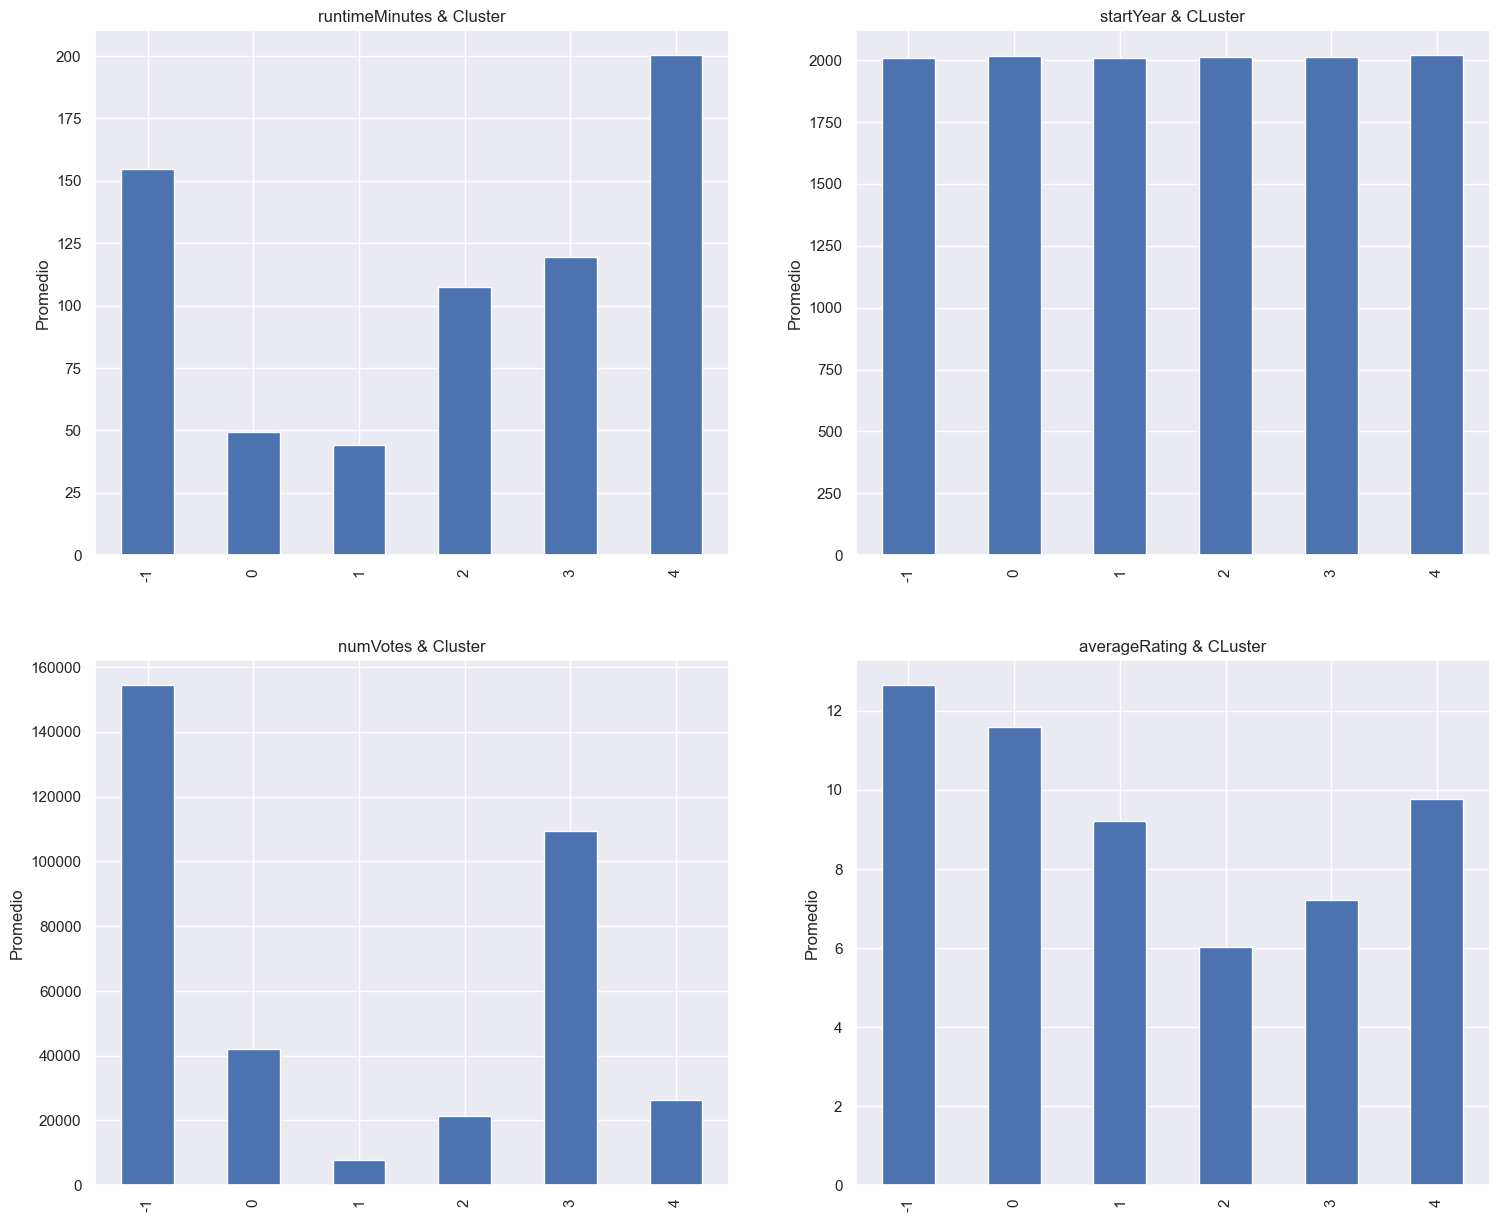

In [21]:
# Graficas columnas con datos numericos

fig, axs = plt.subplots(2, 2, figsize=(18, 15))



plt.sca(axs[0, 1])
grupos = HDBSCAN_data.groupby('Cluster')['startYear'].mean()
grupos.plot(kind='bar', title='startYear & CLuster', ylabel='Promedio',
         xlabel='')

plt.sca(axs[0, 0])
grupos = HDBSCAN_data.groupby('Cluster')['runtimeMinutes'].mean()
grupos.plot(kind='bar', title='runtimeMinutes & Cluster', ylabel='Promedio',
         xlabel='')

plt.sca(axs[1, 1])
grupos = HDBSCAN_data.groupby('Cluster')['averageRating'].mean()
grupos.plot(kind='bar', title='averageRating & CLuster', ylabel='Promedio',
         xlabel='')

plt.sca(axs[1, 0])
grupos = HDBSCAN_data.groupby('Cluster')['numVotes'].mean()
grupos.plot(kind='bar', title='numVotes & Cluster', ylabel='Promedio',
         xlabel='')

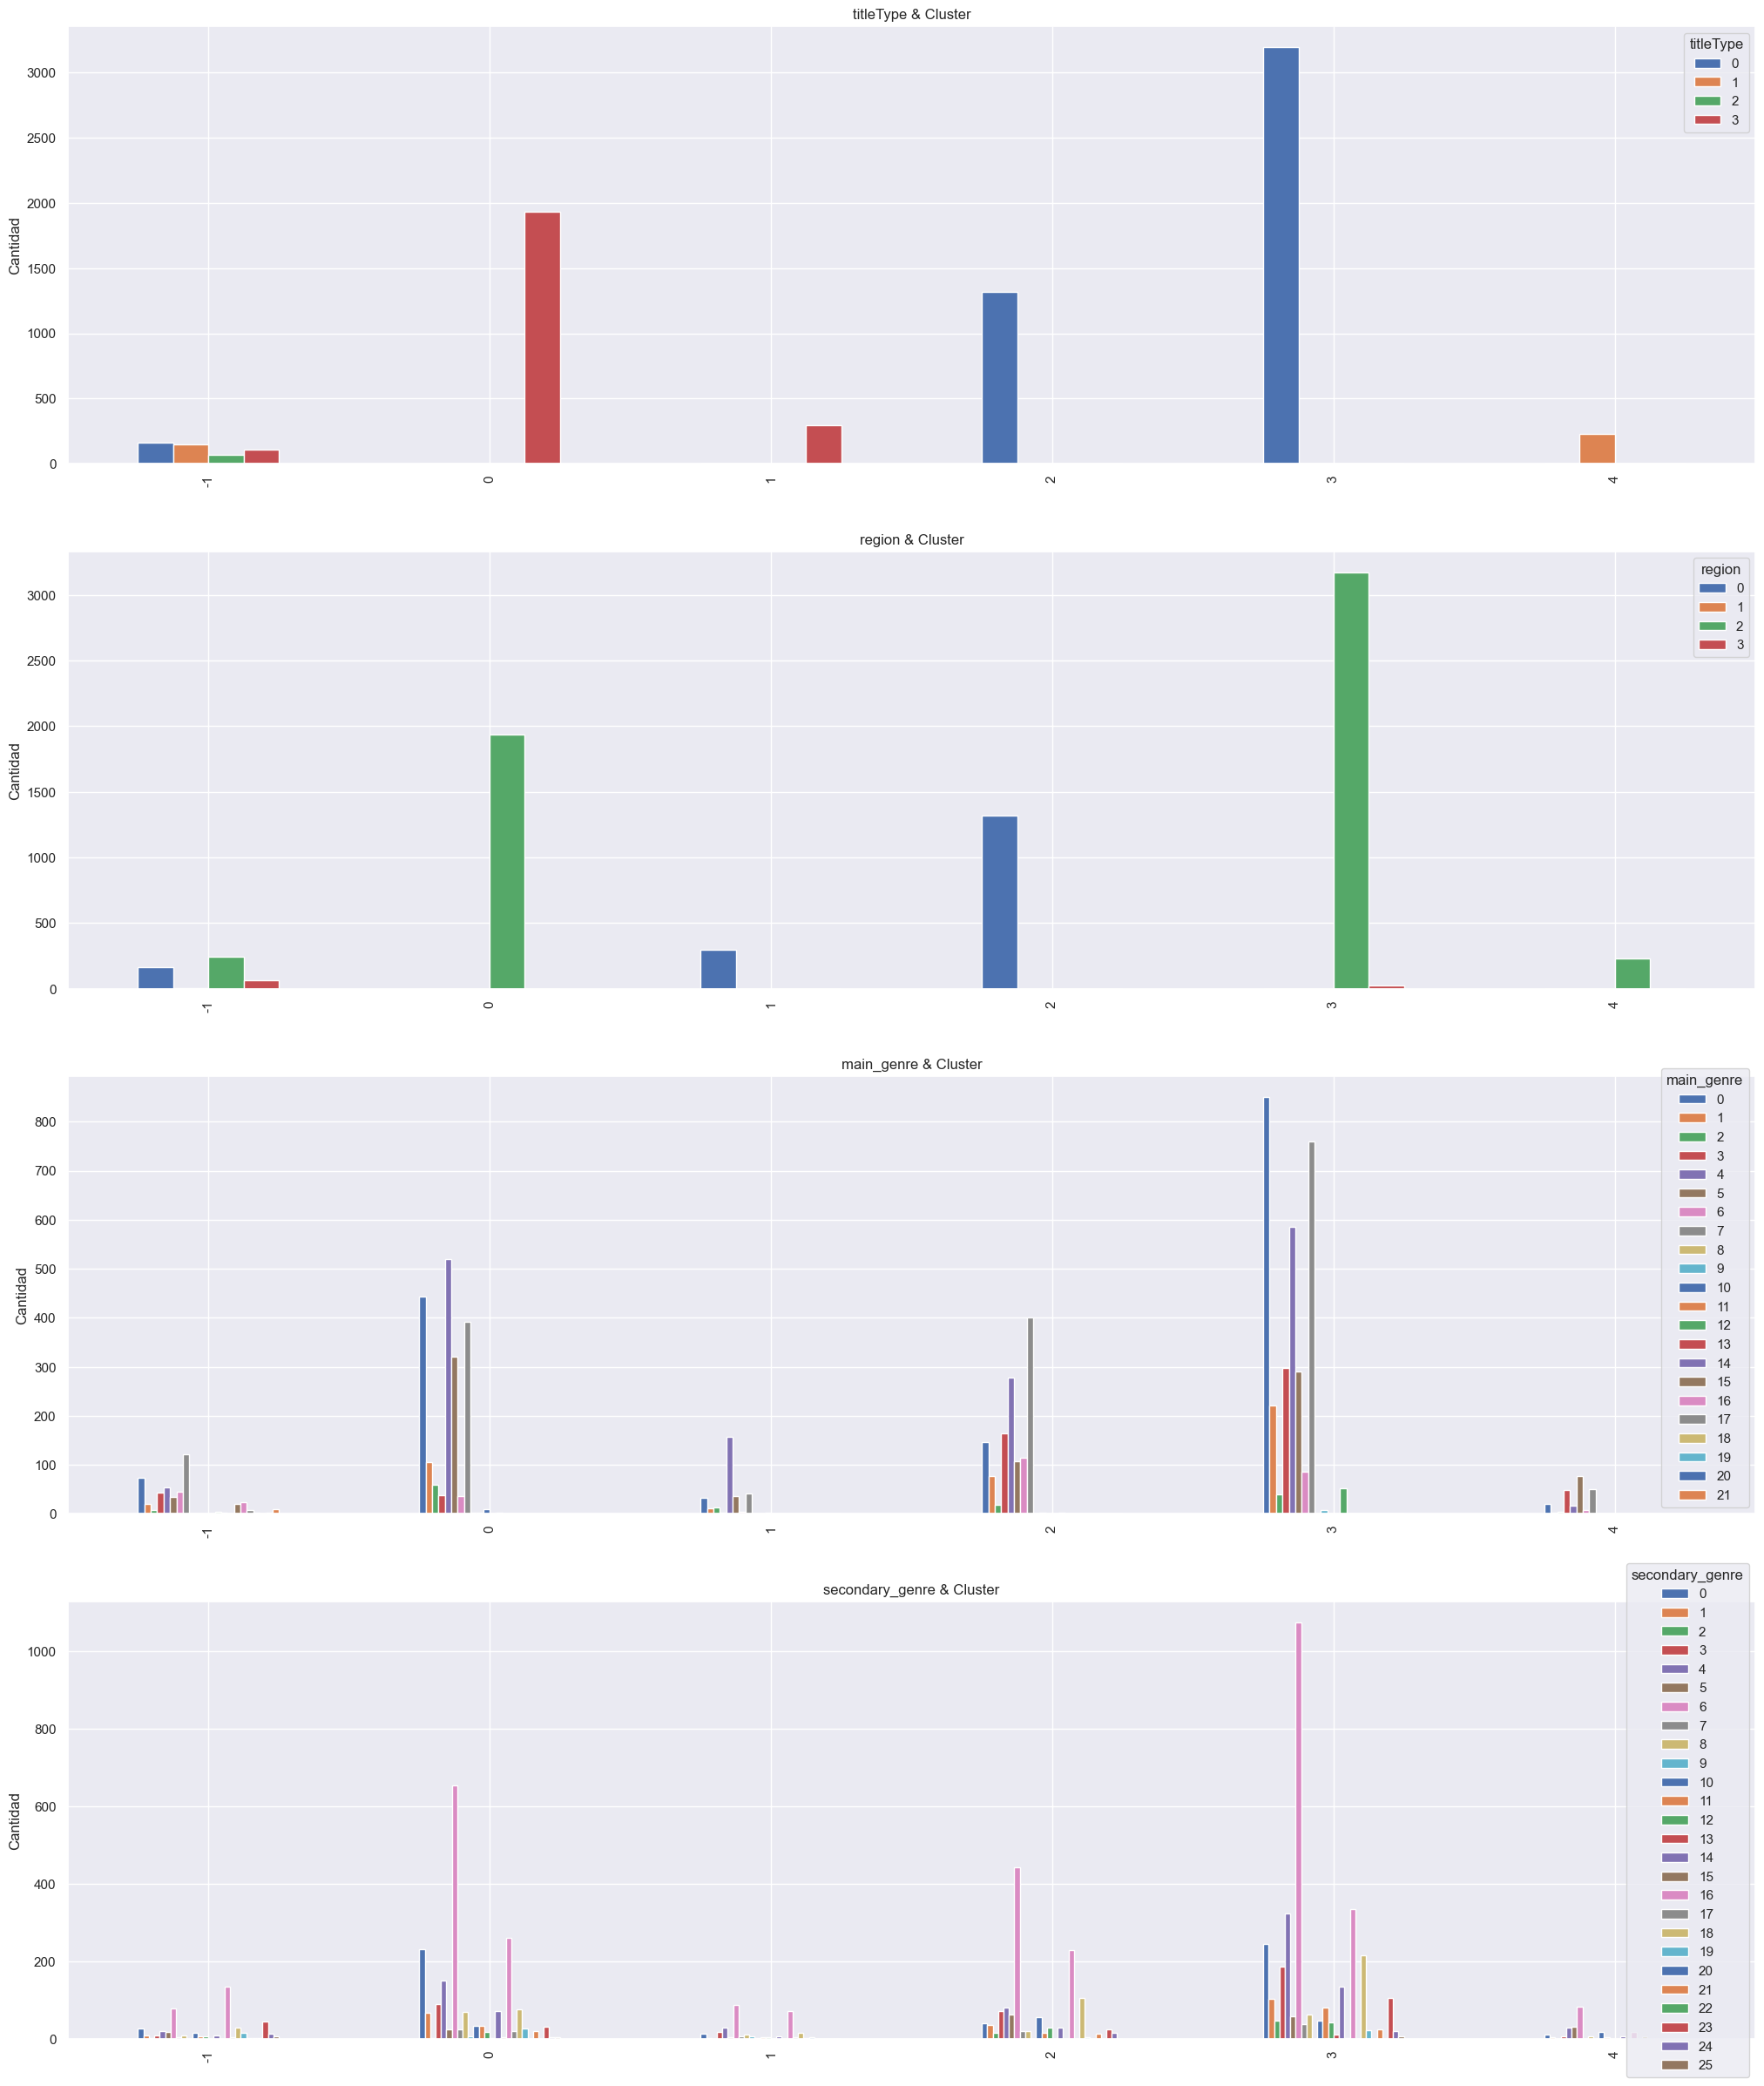

In [22]:
# Graficas columnas con datos categoricos

fig, axs = plt.subplots(4, 1, figsize=(25, 30))

plt.sca(axs[0])
grupos = HDBSCAN_data.groupby('Cluster')['titleType'].value_counts().unstack(fill_value=0)
grupos.plot(kind='bar', title='titleType & Cluster', ylabel='Cantidad',
         xlabel='',ax=axs[0])

plt.sca(axs[1])
grupos = HDBSCAN_data.groupby('Cluster')['region'].value_counts().unstack(fill_value=0)
grupos.plot(kind='bar', title='region & Cluster', ylabel='Cantidad',
         xlabel='',ax=axs[1])
plt.sca(axs[2])
grupos = HDBSCAN_data.groupby('Cluster')['main_genre'].value_counts().unstack(fill_value=0)
grupos.plot(kind='bar', title='main_genre & Cluster', ylabel='Cantidad',
         xlabel='',ax=axs[2])

plt.sca(axs[3])
grupos = HDBSCAN_data.groupby('Cluster')['secondary_genre'].value_counts().unstack(fill_value=0)
grupos.plot(kind='bar', title='secondary_genre & Cluster', ylabel='Cantidad',
         xlabel='',ax=axs[3])
axs[3].legend(title='secondary_genre', loc='center right')